## Name : Somesh Balaji Zamkade

---
## Task 1: Prediction using supervised Machine Learning
###  Predict the percentage of an student based on the no. of study hours.

In this task we have to find the students scores based on their study hours. This is simple regression problem type because it has only two variables. This problem can be solved by using regression libraries or we can make regression algorithm.

---

In [5]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [14]:
# Reading data from remote link
url = "http://bit.ly/w-data"
Data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


## Data Analysis

In [15]:
Data.head(10) # It gives first 10 values of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
Data.tail() # This command gives last five values of dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [17]:
Data.shape  # This command gives shape of dataset

(25, 2)

In [18]:
Data.info()  # This command gives information of data in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
Data.describe() # This command gives Statistical Properties of Dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualisation 

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

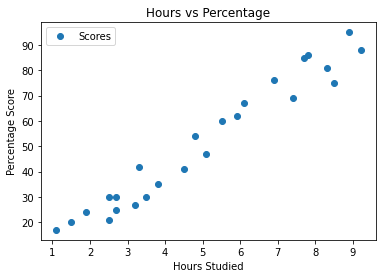

In [20]:
# Plotting the distribution of scores
Data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

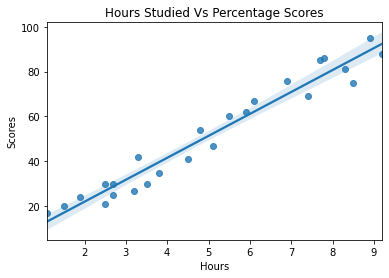

In [22]:
#Plotting regression plot to confirm above relationship between feature and target.
import seaborn as sns
sns.regplot(x=Data['Hours'],y=Data['Scores'],data=Data)
plt.title('Hours Studied Vs Percentage Scores')
plt.show()

## **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [23]:
x = Data.iloc[:, :-1].values  
y = Data.iloc[:, 1].values  
print('Hours Studied=',x[0:5])
print('Scores Obtained=',y[0:5])

Hours Studied= [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
Scores Obtained= [21 47 27 75 30]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

### Train-Test Data Split()

In [24]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [25]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


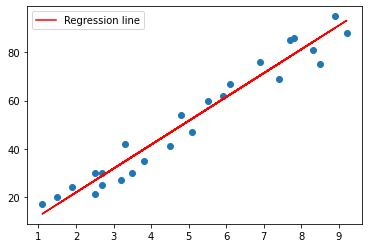

In [64]:
# Plotting the regression line
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red',label='Regression line');
plt.legend()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [27]:
print(x_test) # Testing data - In Hours
y_pred = reg.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [29]:
#Training and Testing Scores
print("Training Score:",reg.score(x_train,y_train))
print("Test Score:",reg.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


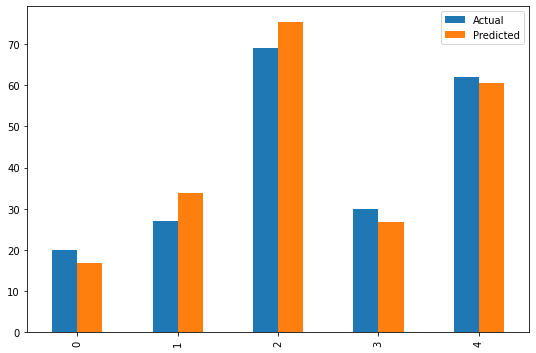

In [30]:
#plot of original and predicted values
df.plot(kind='bar',figsize=(9,6))
plt.show()

In [31]:
# Testing with some new data
hours = float(input("Enter the Study Hours : "))
test = np.array([hours])
test = test.reshape(-1, 1)
my_pred = reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

Enter the Study Hours : 9.25
No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R^2: 0.9454906892105356


From value of R-2 we can say that our model's accurancy is 94.54% .

## Thank You